MAE: 3.991043392857143
RMSE: 5.056407806618989
R²: 0.8939192564887288


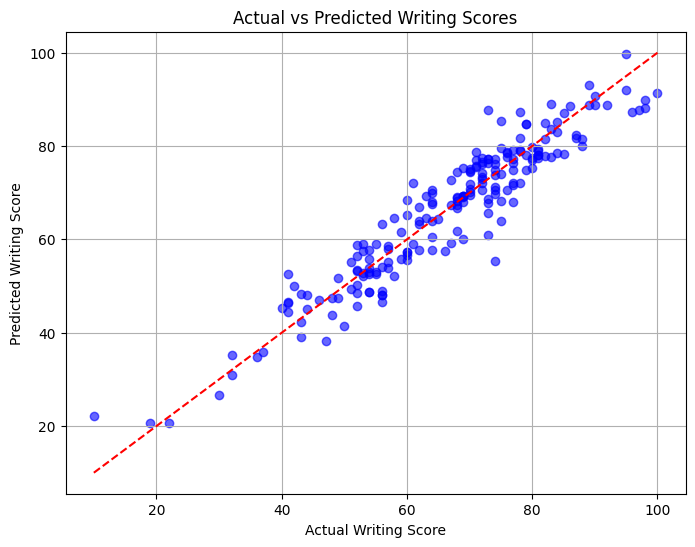


Enter student details to predict writing score:

Parental Education Levels:
0: associate's degree
1: bachelor's degree
2: high school
3: master's degree
4: some college
5: some high school

Predicted Writing Score: 72.03


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('StudentsPerformance.csv')

# Encode categorical feature: parental level of education
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])

# Use 'math score', 'reading score', 'parental level of education' as features to predict 'writing score'
X = df[['math score', 'reading score', 'parental level of education']]
y = df['writing score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Writing Score")
plt.ylabel("Predicted Writing Score")
plt.title("Actual vs Predicted Writing Scores")
plt.grid(True)
plt.show()

# User input for prediction
def get_user_input():
    print("\nEnter student details to predict writing score:")
    math_score = float(input("Math score (0-100): "))
    reading_score = float(input("Reading score (0-100): "))
    print("\nParental Education Levels:")
    for i, val in enumerate(le.classes_):
        print(f"{i}: {val}")
    parental_edu = int(input(f"Choose parental education level (0-{len(le.classes_)-1}): "))
    return [math_score, reading_score, parental_edu]

user_data = get_user_input()

# Wrap user input in DataFrame with column names
user_input_df = pd.DataFrame([user_data], columns=['math score', 'reading score', 'parental level of education'])

# Scale and predict
user_data_scaled = scaler.transform(user_input_df)
predicted_score = model.predict(user_data_scaled)

print(f"\nPredicted Writing Score: {predicted_score[0]:.2f}")